# Ejemplo QPM:

$$ \min_{x_1,x_2} x_1+x_2 $$
$$ \text{s.t. } x_1^2+x_2^2-2 = 0$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x1 = np.linspace(-2,2,500)
x2 = np.linspace(-2,2,500)
x1v, x2v = np.meshgrid(x1, x2)

In [ ]:
f = lambda x1,x2: x1+x2 #funcion objetivo
c = lambda x1,x2: x1**2+x2**2-2 #Restriccion

In [ ]:
Q = lambda x1,x2,u: f(x1,x2) +1/u*(c(x1,x2))**2

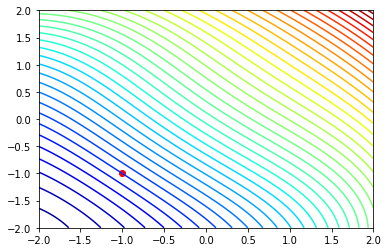

In [ ]:
fig,ax=plt.subplots()
ax.cla()

CS = ax.contour(x1v, x2v, Q(x1v,x2v,50), levels = 50, cmap=plt.cm.jet)
ax.scatter(-1,-1,c = 'r')

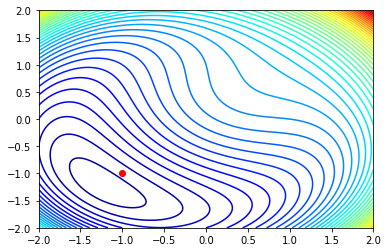

In [ ]:
fig,ax=plt.subplots()
ax.cla()

CS = ax.contour(x1v, x2v, Q(x1v,x2v,5), levels = 50, cmap=plt.cm.jet)
ax.scatter(-1,-1,c = 'r')

In [ ]:
import scipy.optimize as sp
from autograd import grad

f = lambda x: x[0]+x[1] #funcion objetivo
c = lambda x: x[0]**2+x[1]**2-2 #Restriccion
Q = lambda x,u: f(x) +1/u*(c(x))**2
gQ = lambda x,u: np.array([1+1/u*2*c(x)*2*x[0], 1+1/u*2*c(x)*2*x[1]])

def qpm(x0, mu): 
    # Optimizacio sin restrcciones usando el metodo BFGS
    res = sp.minimize(Q, x0, args=(mu), method='BFGS', jac=gQ)
    
    return res.x, res.fun

In [ ]:
gQ(np.array([-1,-1]),20)

array([1., 1.])

In [ ]:
mu = 10
x0 = np.array([.5,.5])

# tolerancia de aceptacion en la violacion de la restriccion en el optimo
vol = 1e-15
rest_viol = True

it = 0

print ("{:<10} {:<10} {:<20} {:^20} {:^30}".format('iter','mu','minimum','condition nr.', 'constraint violation'))
while rest_viol:
    it=it+1
    
    xmin, fun = qpm(x0,mu)
    print ("{:<10d} {:<10.3e} [{:^8.4f}, {:^8.4f}] {:<4} {:^20.3e}".format(it,mu,xmin[0],xmin[1],' ',c(xmin)))
    
    if c(xmin)<=vol:
        rest_viol = False 
    
    # Actualizacion siguiente iteracion
    mu = mu/2
    x0 = xmin

iter       mu         minimum                 condition nr.          constraint violation     
1          1.000e+01  [-1.3804 , -1.3804 ]           1.811e+00      
2          5.000e+00  [-1.2283 , -1.2283 ]           1.018e+00      
3          2.500e+00  [-1.1299 , -1.1299 ]           5.532e-01      
4          1.250e+00  [-1.0705 , -1.0705 ]           2.919e-01      
5          6.250e-01  [-1.0370 , -1.0370 ]           1.507e-01      
6          3.125e-01  [-1.0190 , -1.0190 ]           7.667e-02      
7          1.562e-01  [-1.0096 , -1.0096 ]           3.869e-02      
8          7.812e-02  [-1.0048 , -1.0048 ]           1.944e-02      
9          3.906e-02  [-1.0024 , -1.0024 ]           9.742e-03      
10         1.953e-02  [-1.0012 , -1.0012 ]           4.877e-03      
11         9.766e-03  [-1.0006 , -1.0006 ]           2.440e-03      
12         4.883e-03  [-1.0003 , -1.0003 ]           1.220e-03      
13         2.441e-03  [-1.0002 , -1.0002 ]           6.103e-04      
14      

# ALM:

In [ ]:
f = lambda x1,x2: 21.5-x1*(1.0-x2)**2+(2.25-x1*(1.0-x2**2))**2+(2.625-x1*(2.625-x2**3))**2 #funcion objetivo
c = lambda x1,x2: x1**2+x2**2-2 #Restriccion

L = lambda x1,x2,lam,u: f(x1,x2) + lam*c(x1,x2)+1/u*c(x1,x2)**2